<a href="https://colab.research.google.com/github/Rohanpeerla/Module-8-Lab-1/blob/master/Module_8_Lab_1_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
import tensorflow as tf
import tensorflow_probability as tfp


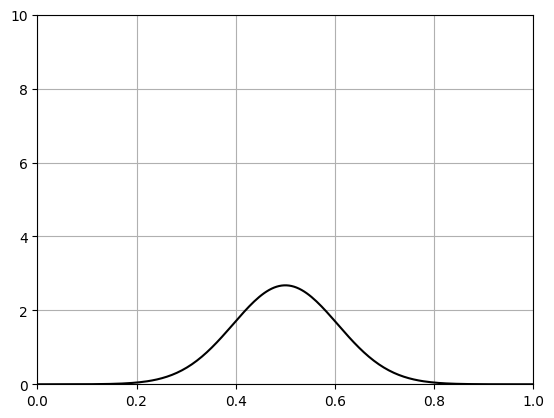

In [3]:
import math
from matplotlib import rc
from matplotlib.animation import FuncAnimation
rc('animation', html='jshtml')
def gaussian_pdf(x, a, b):
    return (1 / np.sqrt(2 * np.pi * b * b))* np.exp(-(x - a)**2 / (b ** 2))

class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)
        self.mean = 0.5
        self.var = 0.050

    def __call__(self, i):
        if i == 0:
            self.line.set_data([], [])
            return self.line,
        self.var += 0.001
        y = gaussian_pdf(self.x, self.mean, self.var)
        self.line.set_data(self.x, y)
        return self.line,
fig, ax = plt.subplots()
ud = UpdateDist(ax)
anim = FuncAnimation(fig, ud, frames=100, interval=200, blit=True)
anim


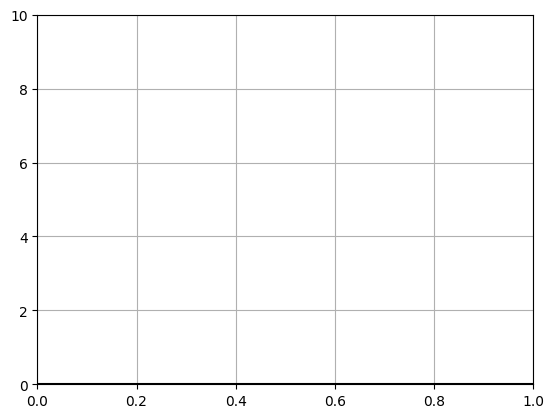

In [5]:
import math
from matplotlib import rc
from matplotlib.animation import FuncAnimation
rc('animation', html='jshtml')
def gaussian_pdf(x, a, b):
    return (1 / np.sqrt(2 * np.pi * b * b))* np.exp(-(x - a)**2 / (b ** 2))
class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)
    def __call__(self, i):
        if i == 0:
            self.mean = 0.5  # Initial mean
            self.var = 0.080  # Initial variance
            self.line.set_data([], [])
            return self.line,
        self.mean += 0.05
        y = gaussian_pdf(self.x, self.mean, self.var)
        self.line.set_data(self.x, y)
        return self.line,

fig, ax = plt.subplots()
ud = UpdateDist(ax)
anim = FuncAnimation(fig, ud, frames=100, interval=200, blit=True)
anim


In [6]:
x, y, z = np.random.normal(size=10000), np.random.normal(size=10000), np.random.normal(size=10000)
v = np.exp(-(x ** 2 + y ** 2 + z ** 2) / (50.0) ** 2)  # Modified sigma value
fig = pg.Figure(data=[pg.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=v,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [8]:
prior_farmer = 0.4
prior_librarian = 0.6
likelihood_farmer = 0.2
likelihood_librarian = 0.8
evidence = "desk_sitter_no_strength"
if evidence == "desk_sitter_no_strength":
    posterior_farmer = (likelihood_farmer * prior_farmer) / ((likelihood_farmer * prior_farmer) + (likelihood_librarian * prior_librarian))
    posterior_librarian = (likelihood_librarian * prior_librarian) / ((likelihood_farmer * prior_farmer) + (likelihood_librarian * prior_librarian))
    print("Posterior probability of being a farmer:", posterior_farmer)
    print("Posterior probability of being a librarian:", posterior_librarian)
else:
    print("Invalid evidence provided.")


Posterior probability of being a farmer: 0.14285714285714288
Posterior probability of being a librarian: 0.857142857142857


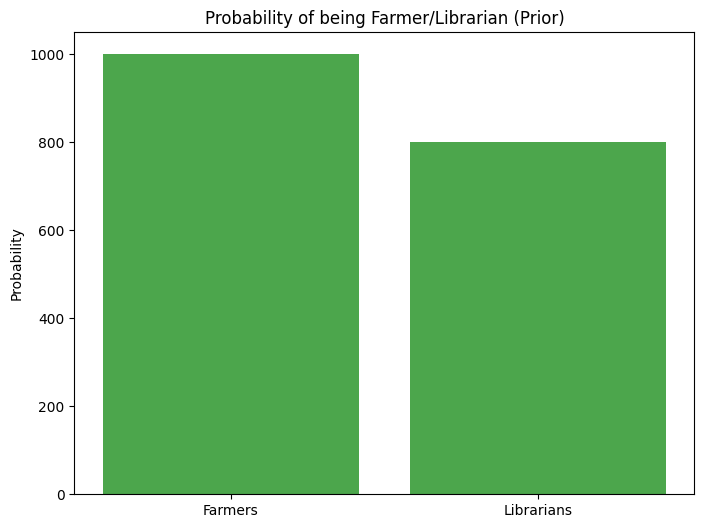

In [11]:
total_farmers = 1000
total_librarians = 800
plt.figure(figsize=(8, 6))
plt.bar([0.3, 0.6], [total_farmers, total_librarians], alpha=0.7, width=0.25, color='Green', lw=3)
plt.xticks([0.3, 0.6], ["Farmers", "Librarians"])
plt.title(r"Probability of being Farmer/Librarian (Prior)")
plt.ylabel("Probability")
plt.show()

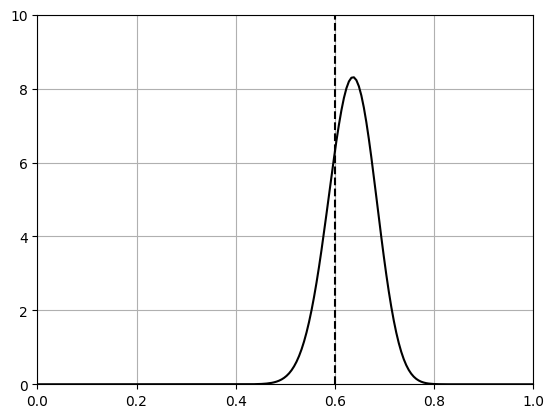

In [13]:
import math
from matplotlib import rc
from matplotlib.animation import FuncAnimation
rc('animation', html='jshtml')
def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))
class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)
        self.ax.axvline(prob, linestyle='--', color='black')
    def __call__(self, i):
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,
fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.6)
anim = FuncAnimation(fig, ud, frames=100, interval=200, blit=True)
anim


In [15]:
def plot_evolution(p_heads_real, prior_strength, p_heads_init, color='RoyalBlue'):
    num_trials = tf.constant([0, 1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000])
    prior = tfp.distributions.Bernoulli(probs=p_heads_real, dtype=tf.int32)
    samples = tf.pad(prior.sample(num_trials[-1]), tf.constant([[1, 0,]]),"CONSTANT")
    cumulative_headcounts = tf.gather(tf.cumsum(samples), num_trials)
    rv_observed_heads = tfp.distributions.Beta(
        concentration1=tf.cast(int(prior_strength * p_heads_init) + cumulative_headcounts, tf.float32),
        concentration0=tf.cast(int(prior_strength * (1 - p_heads_init)) + num_trials - cumulative_headcounts, tf.float32))
    probs_of_heads = tf.linspace(start=0., stop=1., num=100, name="linspace")
    observed_probs_heads = tf.transpose(rv_observed_heads.prob(probs_of_heads[:, tf.newaxis]))
    plt.figure(figsize=(12, 30))
    for i in range(len(num_trials)):
        sx = plt.subplot(len(num_trials), 1, i+1)
        plt.xlabel("$f$, fraction of heads")
        plt.ylabel("$p(f)$, probability")
        plt.setp(sx.get_yticklabels(), visible=False)
        plt.plot(probs_of_heads, observed_probs_heads[i], label="%d tosses\n%d heads\n%d tails " % (
            num_trials[i], num_trials[i] - cumulative_headcounts[i], cumulative_headcounts[i]), color=color)
        plt.fill_between(probs_of_heads, 0, observed_probs_heads[i],  color=color, alpha=0.4)
        plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
        plt.legend().get_frame().set_alpha(0.4)
        plt.autoscale(tight=True)
    plt.suptitle("Bayesian updating of posterior probabilities\nFair coin starting from Uniform Prior", y=1.02, fontsize=14)
    plt.tight_layout()


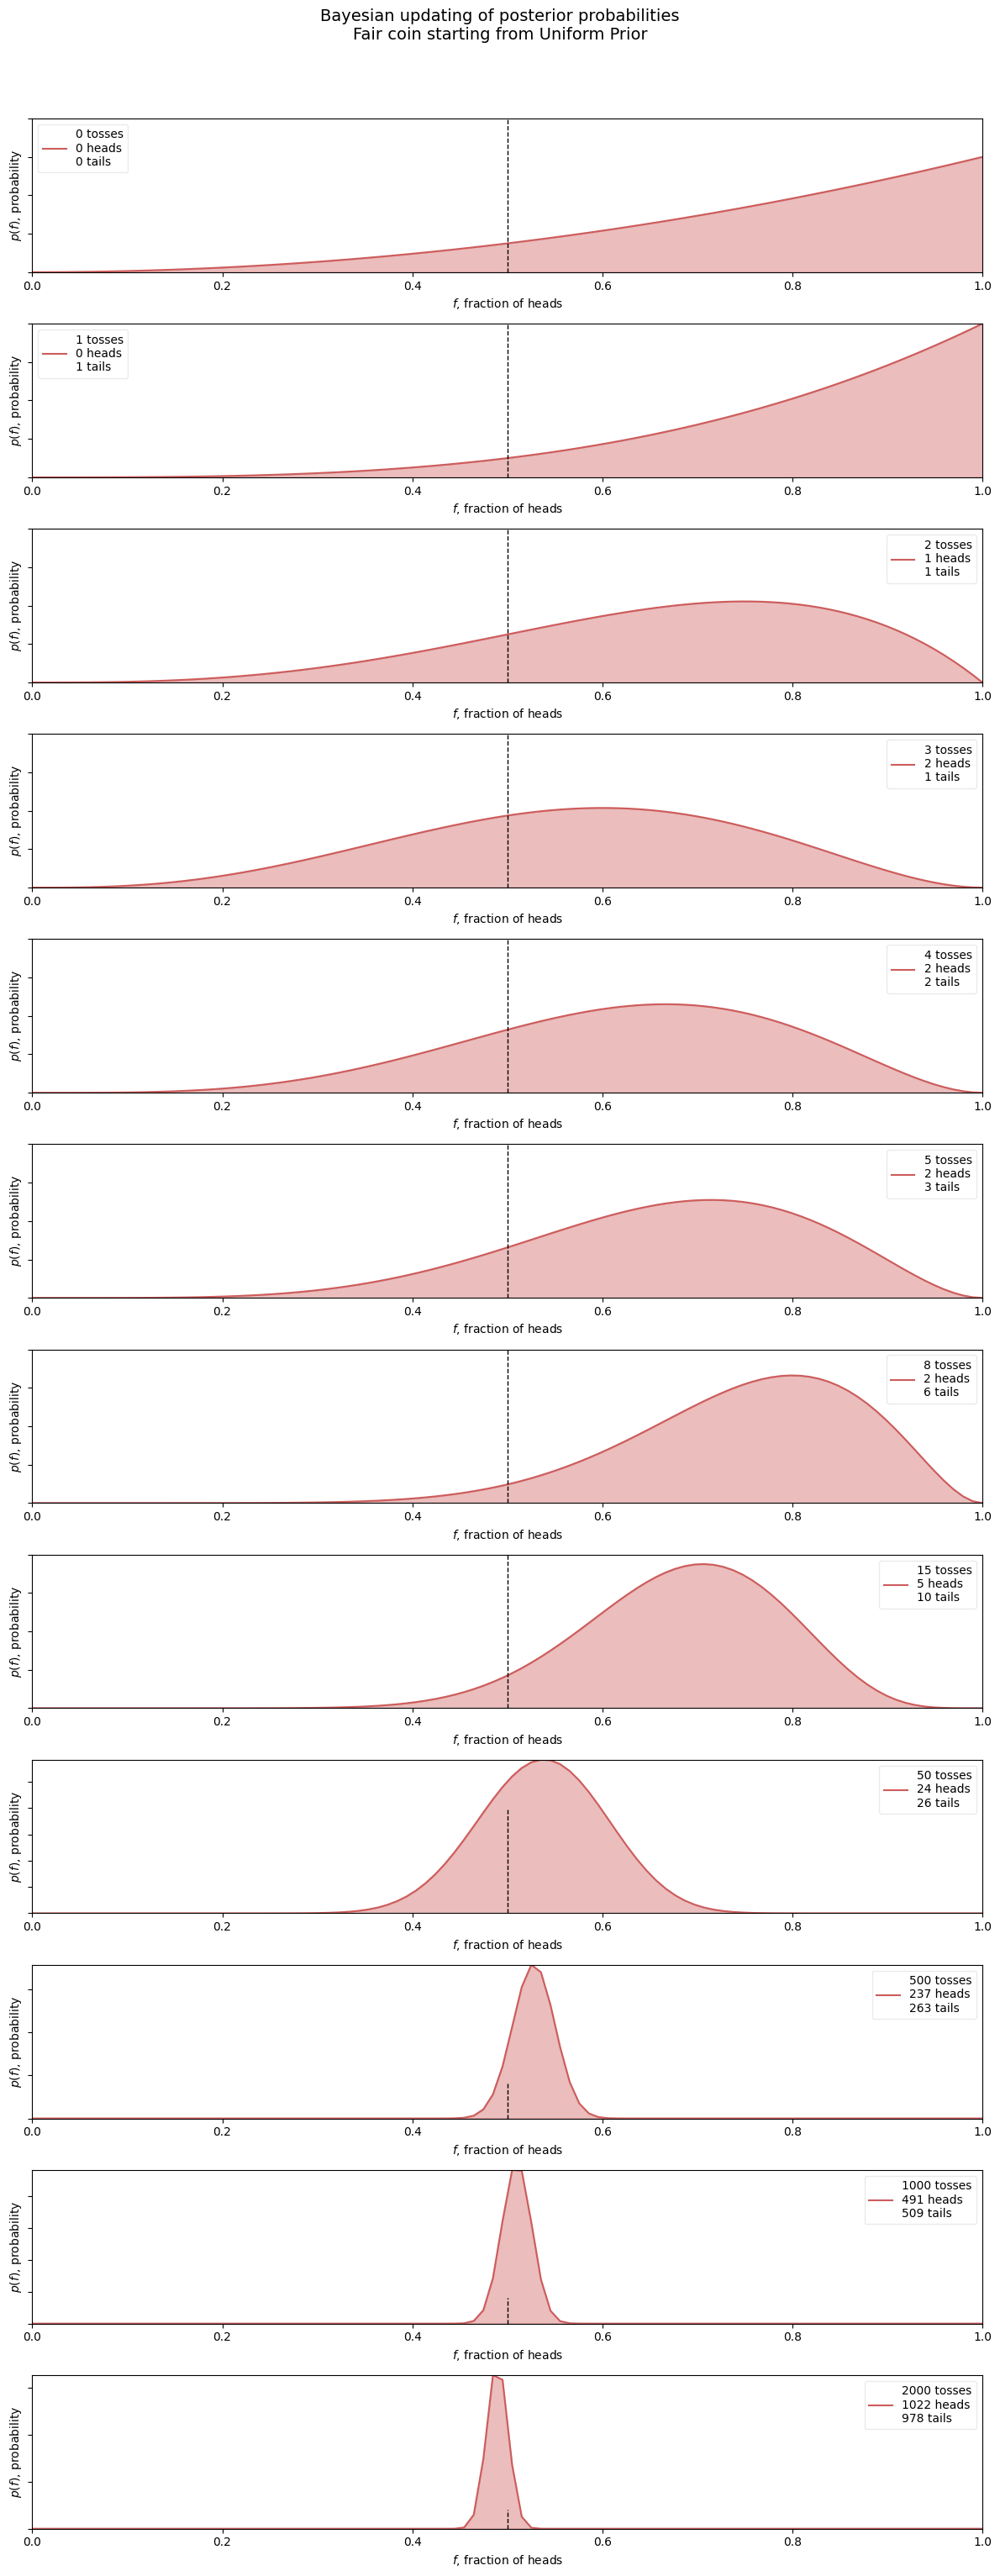

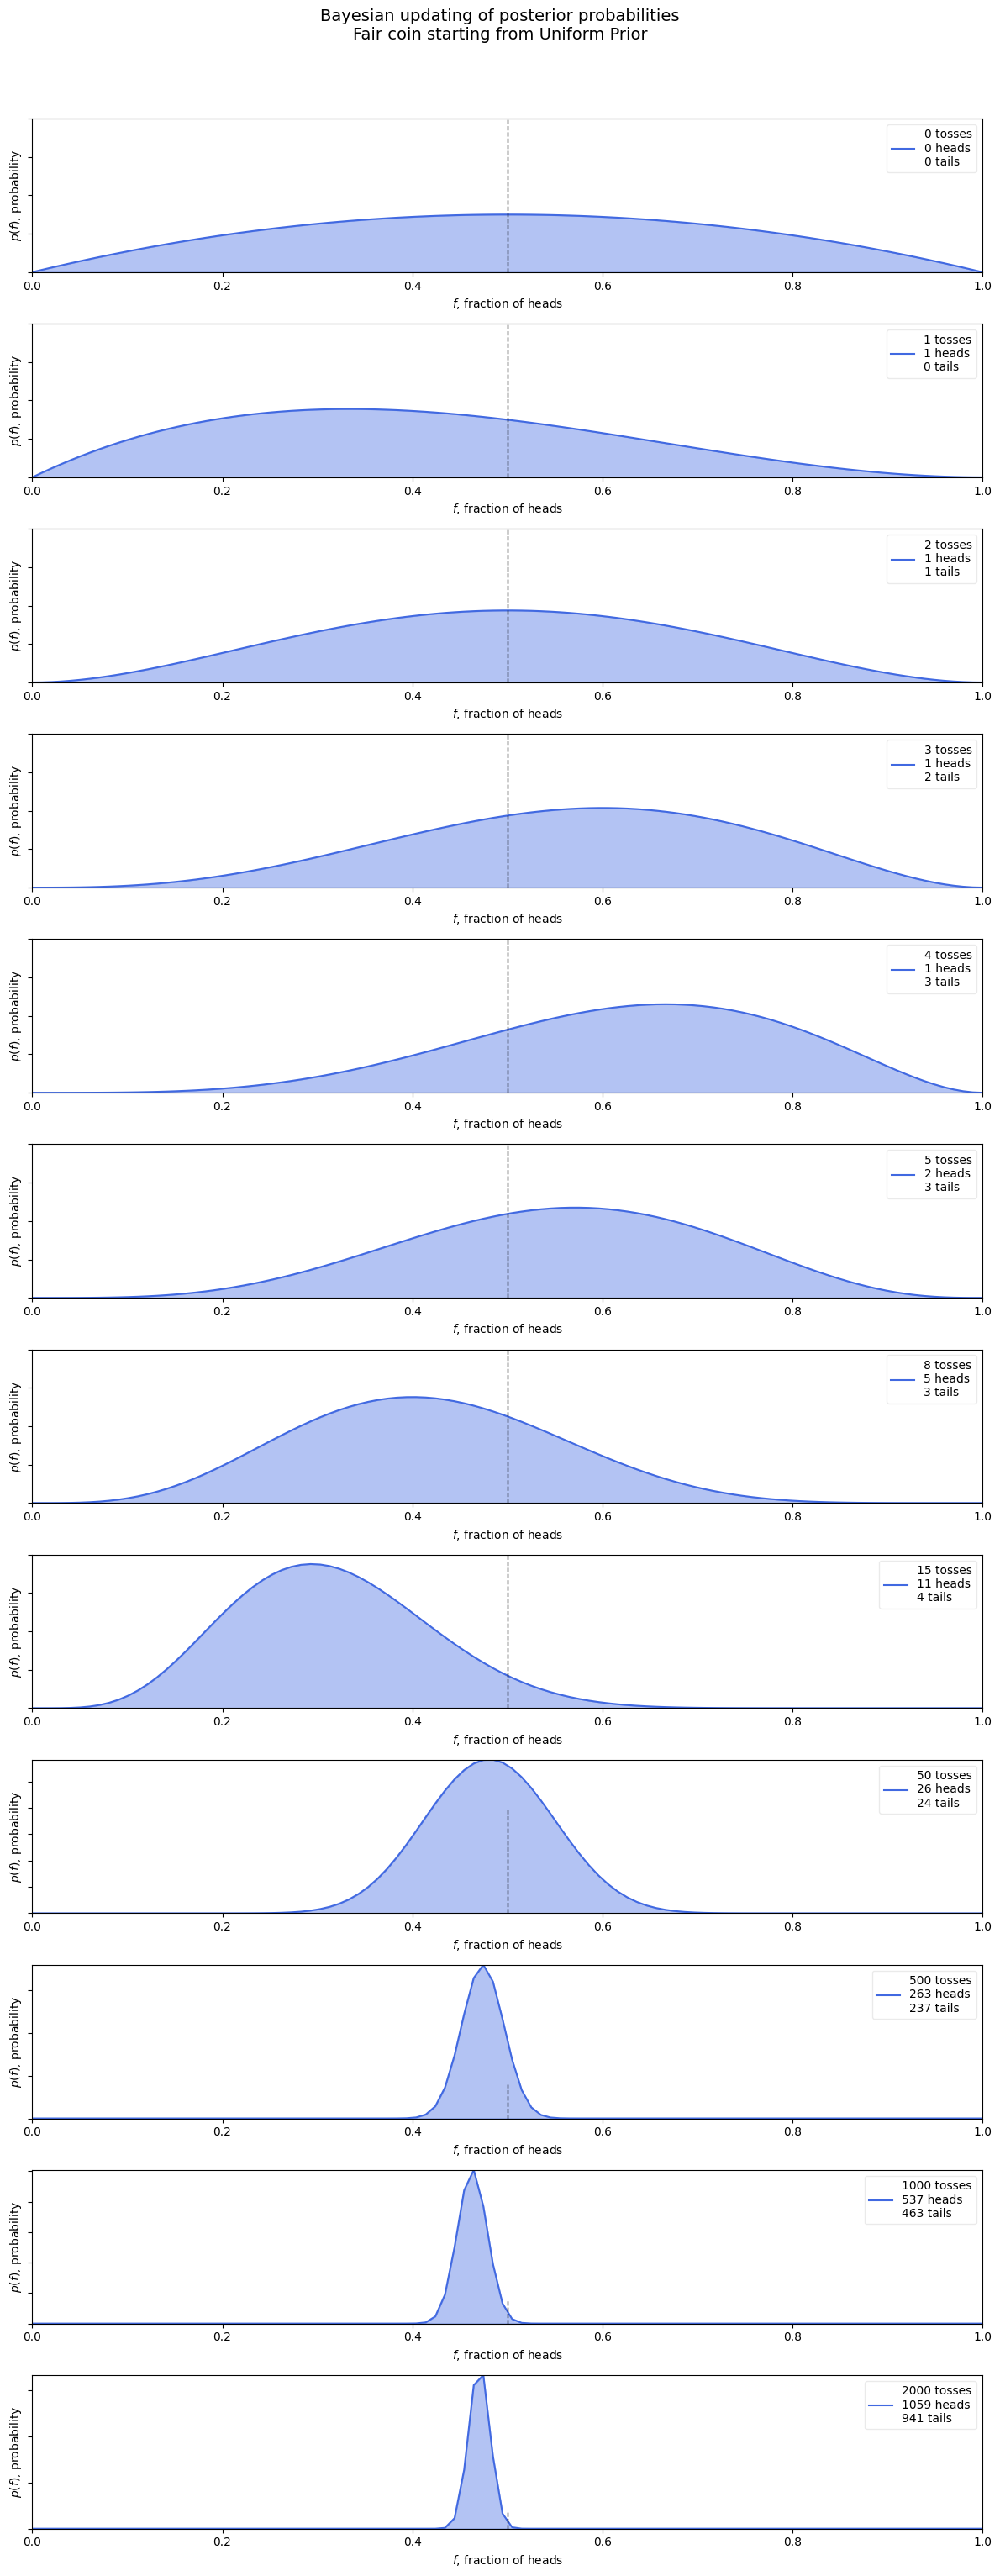

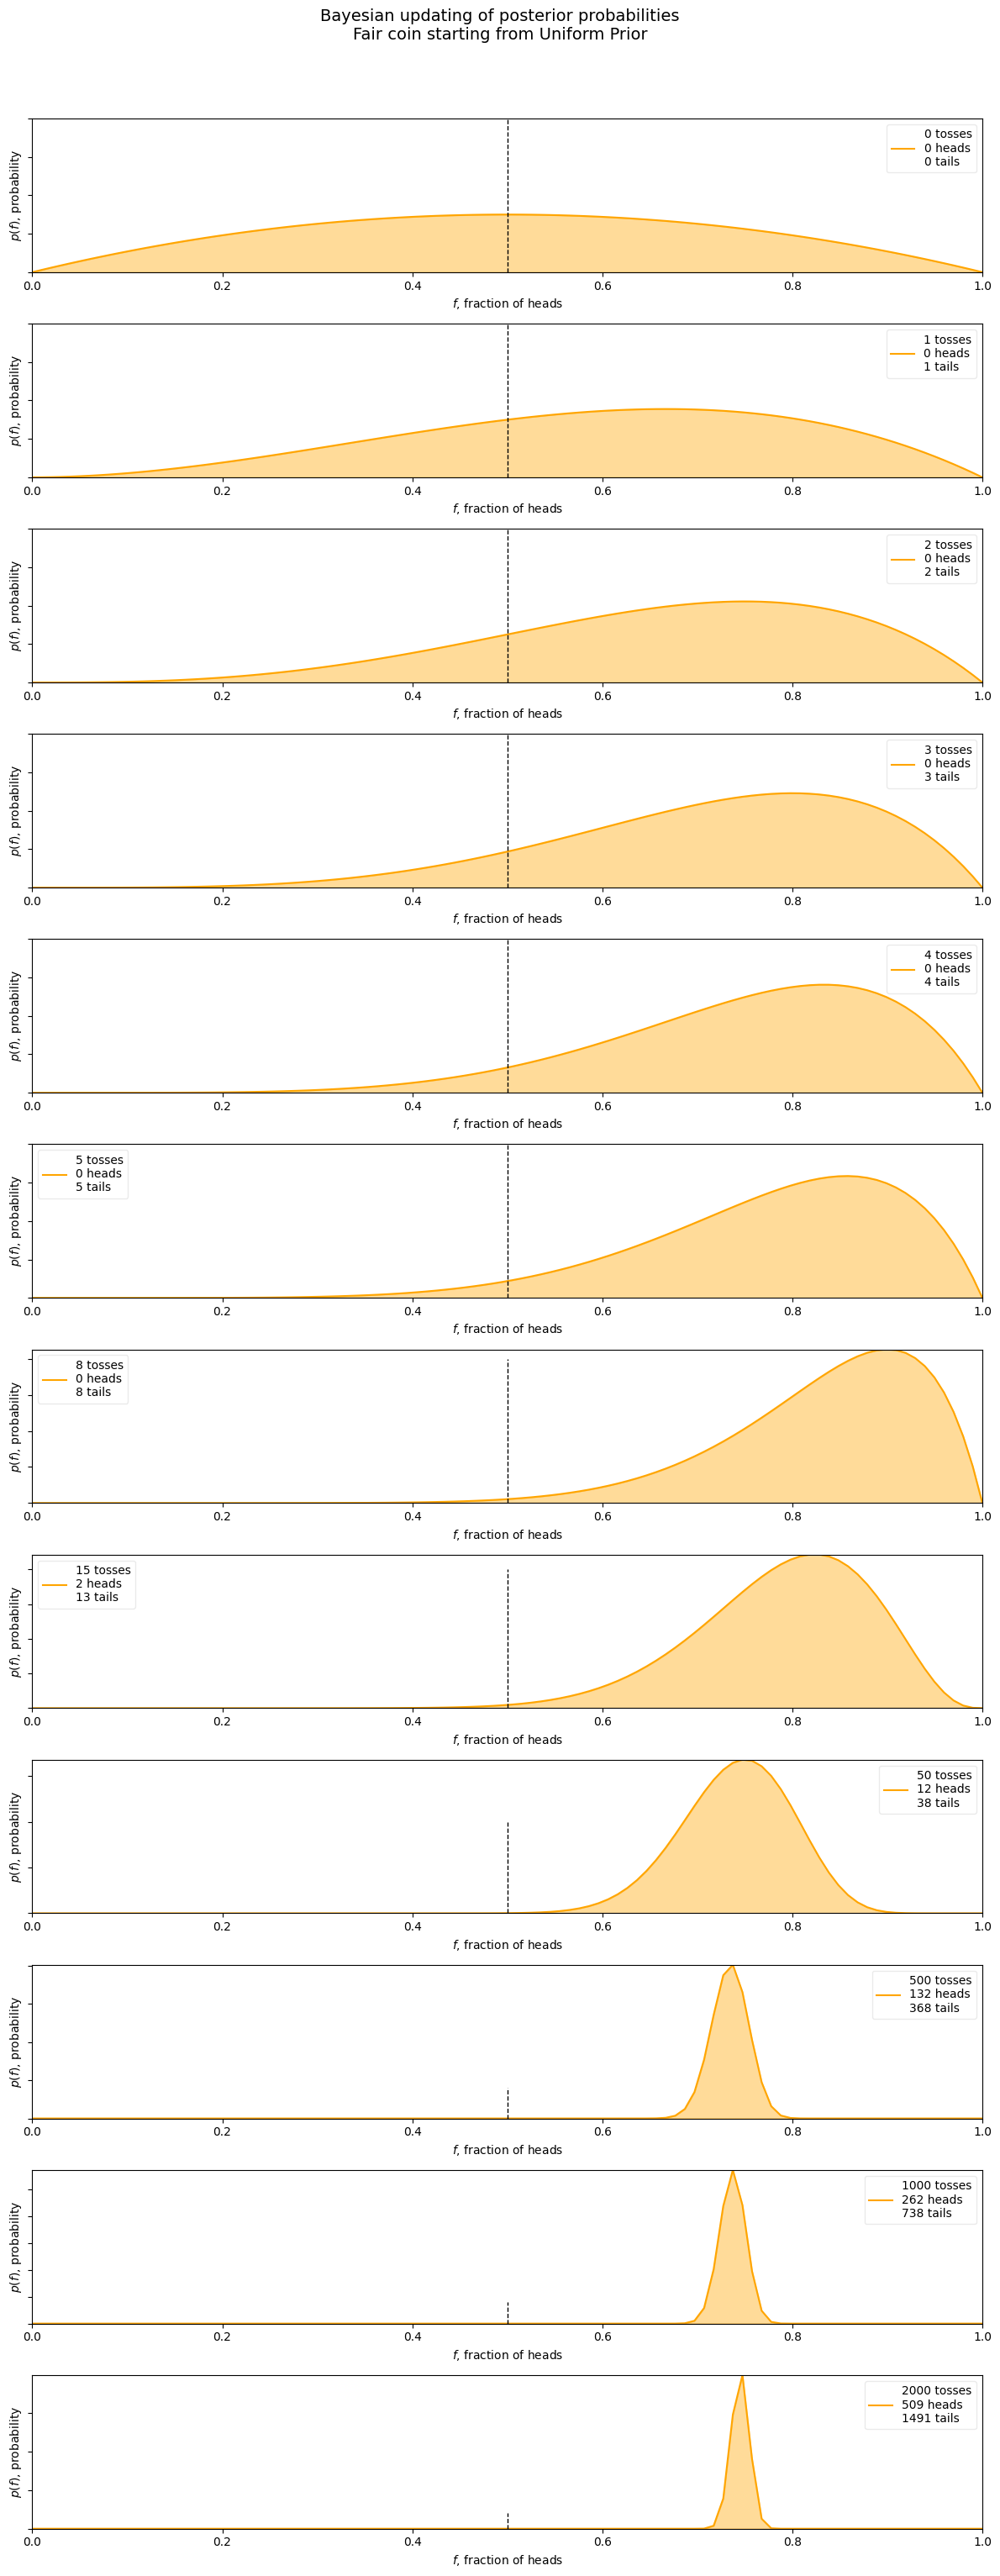

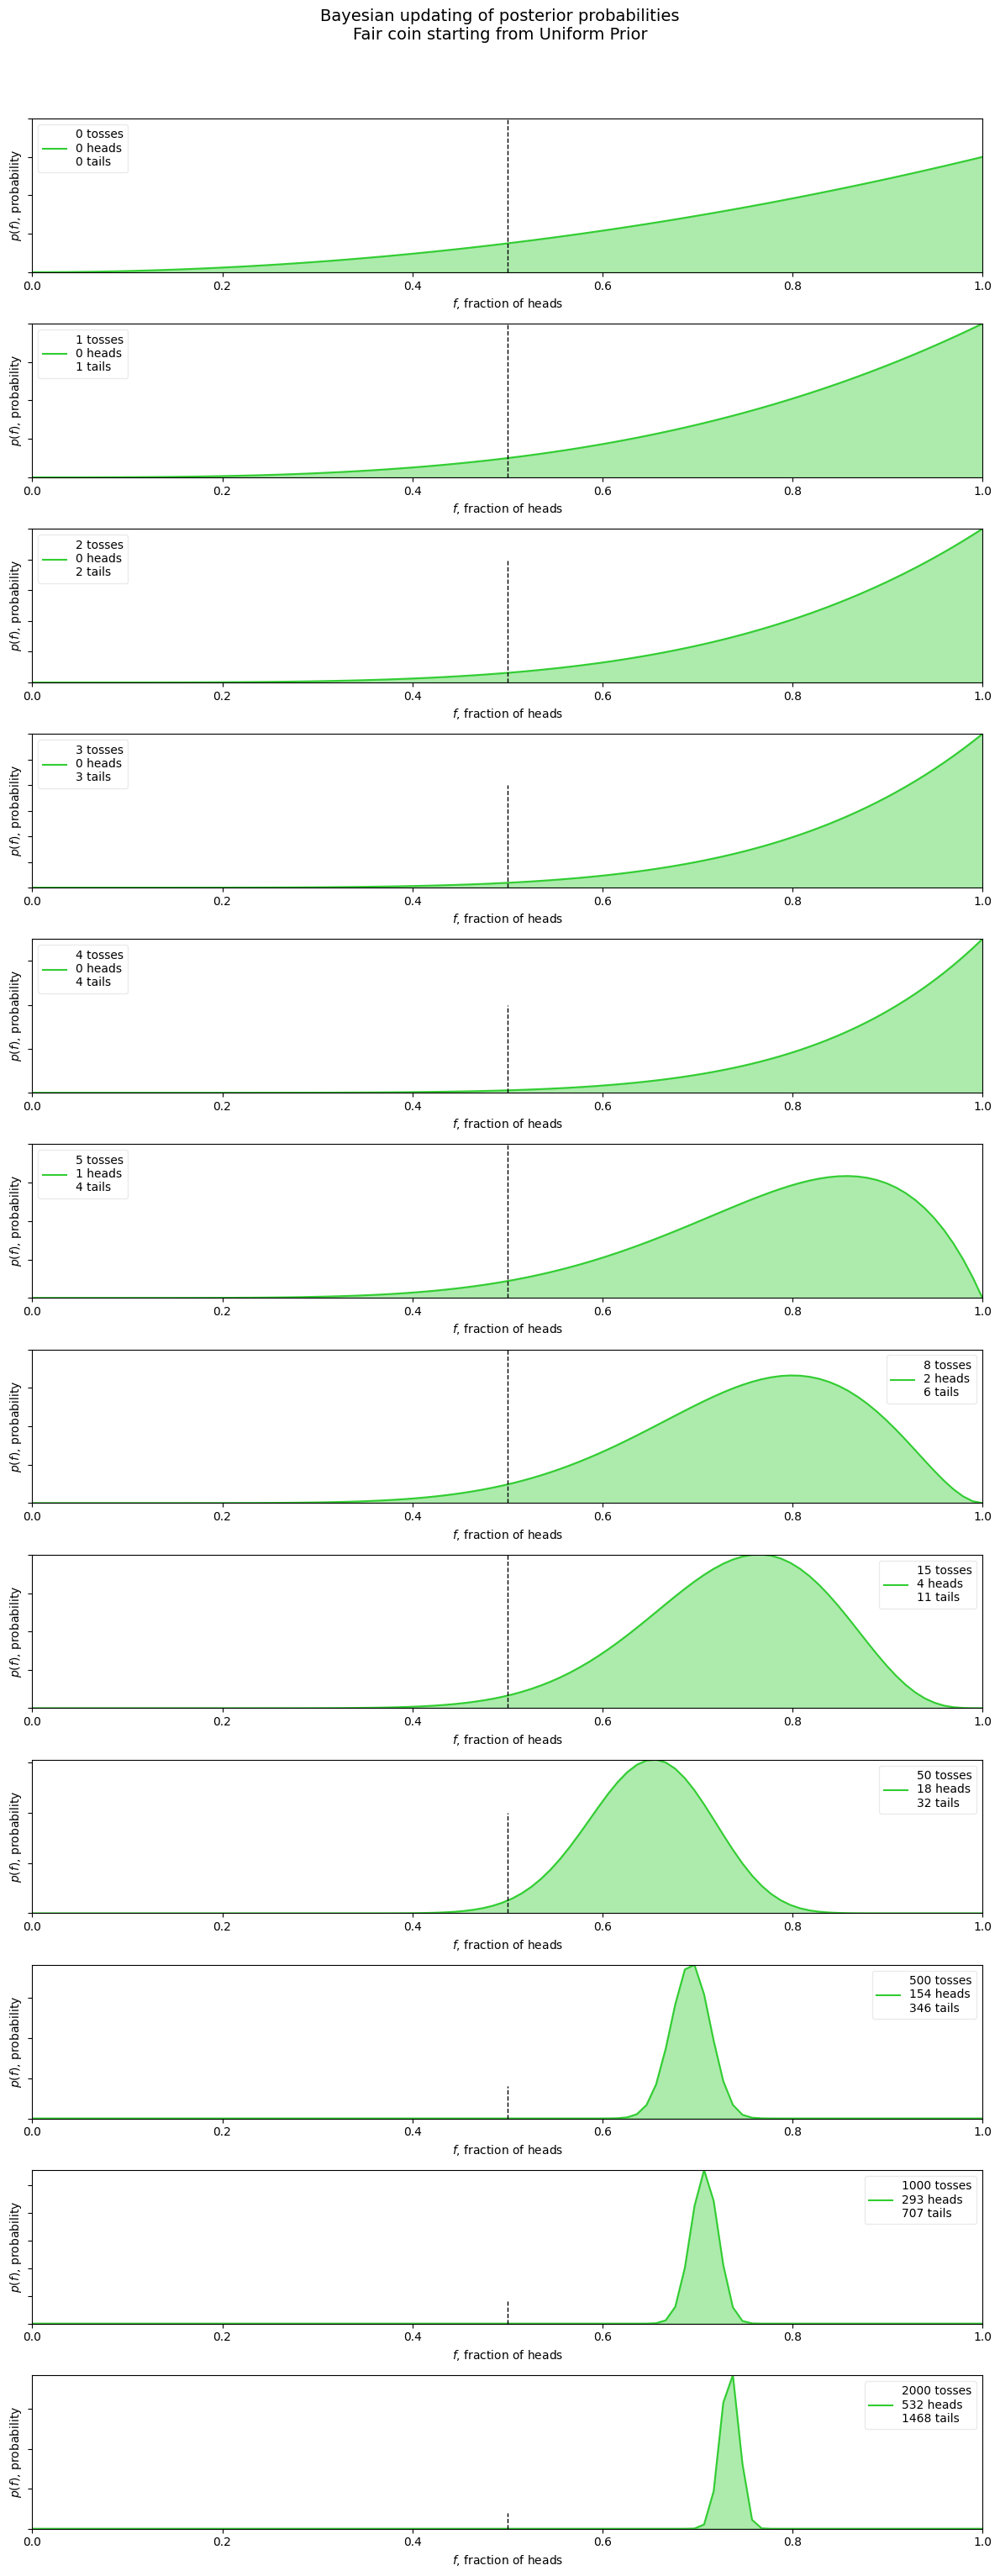

In [17]:
plot_evolution(0.5, 4.0, 0.75, "IndianRed")
plot_evolution(0.5, 4.0, 0.5, "RoyalBlue")
plot_evolution(0.75, 4.0, 0.5, "Orange")
plot_evolution(0.75, 4.0, 0.75, "LimeGreen")
